In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Group Members - Paanidhar - C0924368
Aarjeyan - c0927422

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [3]:
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [4]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


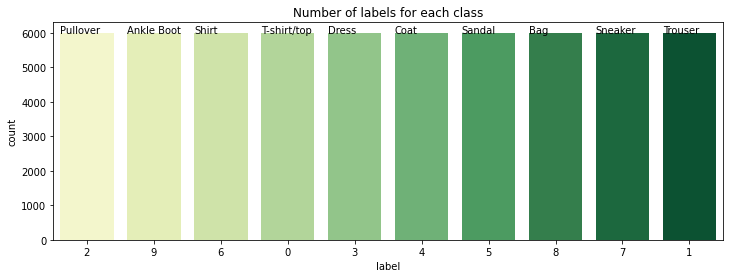

In [5]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

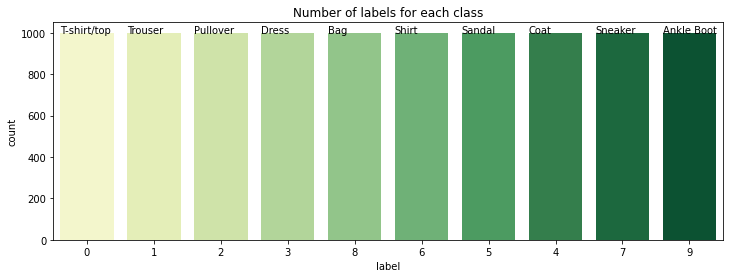

In [6]:
plot_label_per_class(test_data)

In [7]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


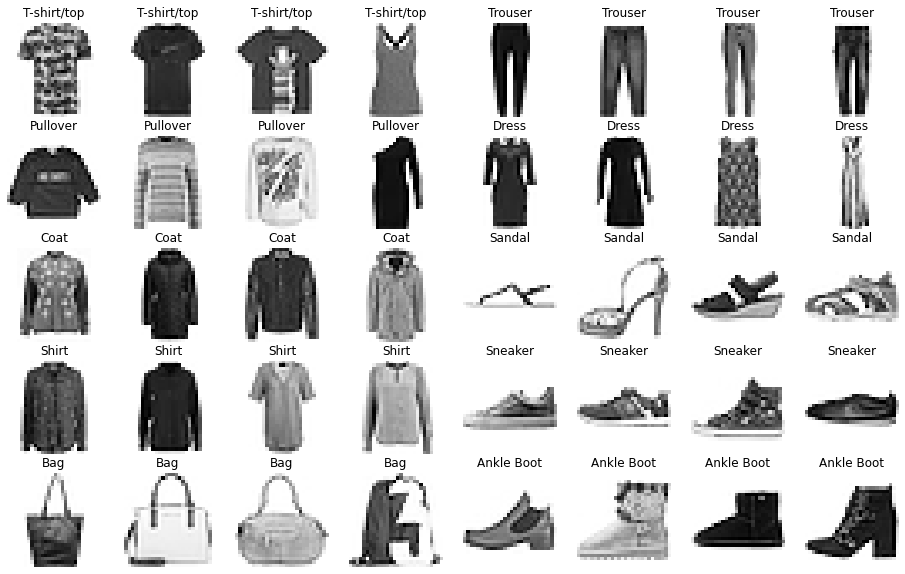

In [8]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Greys"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greys")

Total number of sample images to plot:  40


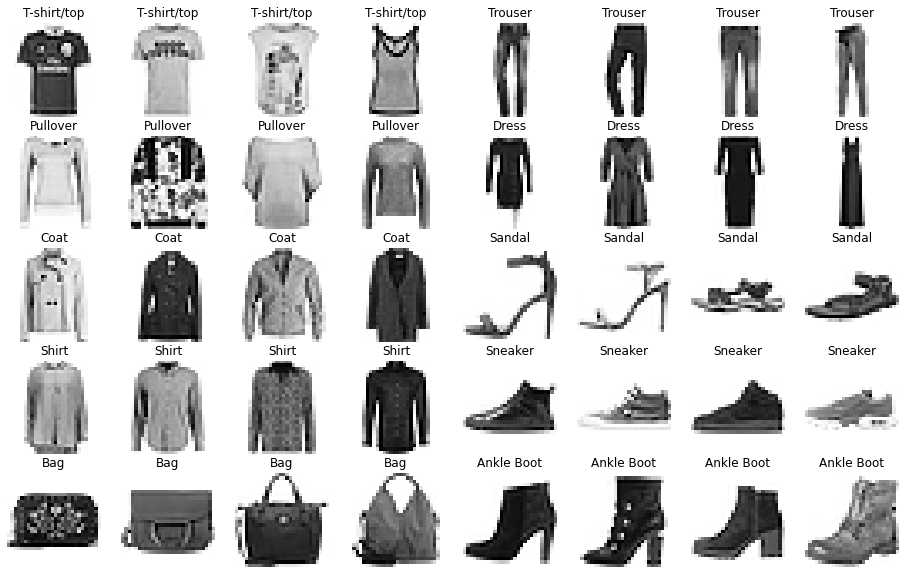

In [9]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels,"Greys")

In [10]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.np_utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from keras.utils import np_utils

# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
print("training set size",x_train.shape[0], x_train.shape[1:4])
print("validation set size",x_val.shape[0], x_val.shape[1:4])
print("test set size",X_test.shape[0]," columns:", X_test.shape[1:4])

training set size 48000 (28, 28, 1)
validation set size 12000 (28, 28, 1)
test set size 10000  columns: (28, 28, 1)


### CNN

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers. 

 <p>💎 Convolutional layer </p>
 <p>💎 Pooling layer </p>
 <p>💎 Fully-connected (FC) layer</p>



#### Convolutional layer

The convolutional layer is the core building block of a CNN, and it is where the majority of computation occurs. It requires a few components, which are input data, a filter, and a feature map. Let’s assume that the input will be a color image, which is made up of a matrix of pixels in 3D. This means that the input will have three dimensions a height, width, and depth, which correspond to RGB in an image. We also have a feature detector, also known as a kernel or a filter, which will move across the receptive fields of the image, checking if the feature is present. This process is known as a convolution. 

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/Convolutional%20operation%20(2).gif?raw=true" style="width:500px;height:300px;"></center>

The feature detector is a two-dimensional (2-D) weighted array that represents a portion of the image. The filter size, which can vary in size, is usually a 3x3 matrix, which also affects the size of the receptive field. After that, the filter is applied to a portion of the image, and a dot product between the input pixels and the filter is calculated. After that, the dot product is loaded into an output array. The filter then shifts by a stride, and the procedure is repeated until the kernel has swept across the entire image. A feature map, activation map, or convolved feature is the ultimate output of a series of dot products from the input and the filter. The feature detector's weights stay fixed as it advances over the image, a technique known as parameter sharing. Backpropagation and gradient descent are used to change some parameters, such as weight values, during training. However, there are three hyperparameters that determine the output volume size that must be established before the neural network training begins.

1.  The <b>number of filters</b> affects the depth of the output. For example, three distinct filters would yield three different feature maps, creating a depth of three. 

2. <b>Stride </b>is the distance, or number of pixels, that the kernel moves over the input matrix. While stride values of two or greater is rare, a larger stride yields a smaller output.

3. <b>Padding</b> is usually used when the filters do not fit the input image. This sets all elements that fall outside of the input matrix to zero, producing a larger or equally sized output.

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/padding%20(1).gif?raw=true" style="width:500px;height:300px;"></center>


#### pooling layer

Downsampling, also known as pooling layers, is a dimensionality reduction technique that reduces the number of factors in the input. The pooling process sweeps a filter across the entire input, similar to the convolutional layer, however this filter does not have any weights. Instead, the kernel uses an aggregation function to populate the output array from the values in the receptive field. Pooling can be divided into two categories called max pooling and average pooling.

Max pooling
<p>As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. As an aside, this approach tends to be used more often compared to average pooling.</p>

Average pooling
<p>As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.</p>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/pooling.gif?raw=true" style="width:500px;height:300px;"></center>



#### Fully connected layers

The full-connected layer's name is self-explanatory. In partially linked layers, the pixel values of the input image are not directly connected to the output layer, as previously stated. Each node in the output layer, on the other hand, connects directly to a node in the previous layer in the fully-connected layer.
This layer performs classification tasks based on the features retrieved by the previous layers and their various filters. While convolutional and pooling layers typically utilize ReLu functions to categorize inputs, FC layers typically use a softmax activation function to provide a probability from 0 to 1.

<p>For more details: </p>

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://www.ibm.com/cloud/learn/convolutional-neural-networks



In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [15]:
# Model
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))

In [16]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        2

In [18]:
train_model = cnn.fit(x_train, y_train,
                  batch_size=256,
                  epochs=100,
                  validation_data=(x_val, y_val))

Epoch 1/100
188/188 [==============================] - 11s 20ms/step - loss: 0.5589 - accuracy: 0.8065 - val_loss: 3.6217 - val_accuracy: 0.1373
Epoch 2/100
188/188 [==============================] - 3s 18ms/step - loss: 0.3476 - accuracy: 0.8758 - val_loss: 1.3365 - val_accuracy: 0.5322
Epoch 3/100
188/188 [==============================] - 3s 18ms/step - loss: 0.2787 - accuracy: 0.9003 - val_loss: 0.3040 - val_accuracy: 0.8910
Epoch 4/100
188/188 [==============================] - 3s 17ms/step - loss: 0.2383 - accuracy: 0.9145 - val_loss: 0.2616 - val_accuracy: 0.9072
Epoch 5/100
188/188 [==============================] - 3s 17ms/step - loss: 0.2078 - accuracy: 0.9263 - val_loss: 0.2388 - val_accuracy: 0.9175
Epoch 6/100
188/188 [==============================] - 3s 17ms/step - loss: 0.1802 - accuracy: 0.9353 - val_loss: 0.2247 - val_accuracy: 0.9211
Epoch 7/100
188/188 [==============================] - 3s 17ms/step - loss: 0.1623 - accuracy: 0.9420 - val_loss: 0.2329 - val_accuracy

In [19]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3751155138015747
Test accuracy: 0.933899998664856


### CNN with 4 convolutional layers

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(BatchNormalization())

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Flatten())

cnn1.add(Dense(512, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(128, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(10, activation='softmax'))

In [21]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)       

In [23]:
history = cnn1.fit(x_train, y_train,
          batch_size=256,
          epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
188/188 [==============================] - 3s 13ms/step - loss: 0.7566 - accuracy: 0.7368 - val_loss: 2.9341 - val_accuracy: 0.1067
Epoch 2/100
188/188 [==============================] - 2s 11ms/step - loss: 0.4426 - accuracy: 0.8414 - val_loss: 1.0348 - val_accuracy: 0.6762
Epoch 3/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3642 - accuracy: 0.8713 - val_loss: 0.4198 - val_accuracy: 0.8453
Epoch 4/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3305 - accuracy: 0.8831 - val_loss: 0.2932 - val_accuracy: 0.8944
Epoch 5/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3033 - accuracy: 0.8912 - val_loss: 0.2421 - val_accuracy: 0.9109
Epoch 6/100
188/188 [==============================] - 2s 11ms/step - loss: 0.2845 - accuracy: 0.8982 - val_loss: 0.2522 - val_accuracy: 0.9076
Epoch 7/100
188/188 [==============================] - 2s 11ms/step - loss: 0.2714 - accuracy: 0.9015 - val_loss: 0.2404 - val_accuracy:

In [24]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2149040699005127
Test accuracy: 0.9453999996185303


In [40]:
y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.optimizers import Adam 


def cmodel(learning_rate=0.001, dropout_rate=0.25, dense_neurons=512):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    
    model.add(Flatten())
    
    model.add(Dense(dense_neurons, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn=cmodel, verbose=1)


param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.25, 0.5],
    'dense_neurons': [256, 512, 1024],
    'batch_size': [128, 256],
    'epochs': [50, 100]
}


kfold = KFold(n_splits=5, shuffle=True, random_state=42)


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', verbose=1)
grid_result = grid.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


best_model = grid_result.best_estimator_
validation_score = best_model.score(x_val, y_val)
print("Validation Accuracy: %.2f%%" % (validation_score * 100))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
300/300 [==============================] - 3s 6ms/step - loss: 0.7873 - accuracy: 0.7254
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4701 - accuracy: 0.8313
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 0.3888 - accuracy: 0.8625
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 0.3504 - accuracy: 0.8767
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 0.3286 - accuracy: 0.8848
Epoch 6/50
300/300 [==============================] - 2s 6ms/step - loss: 0.3024 - accuracy: 0.8930
Epoch 7/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2856 - accuracy: 0.8988
Epoch 8/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2765 - accuracy: 0.9023
Epoch 9/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2626 - accuracy: 0.9059
Epoch 10/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2543 - accuracy: 0.9095

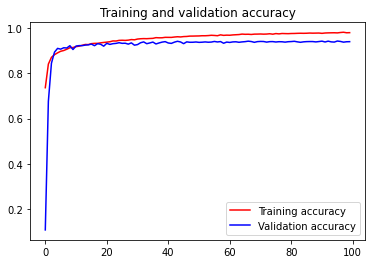

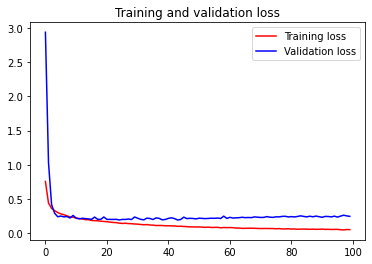

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
# Predictions for the test data
predicted_classes = (cnn1.predict(X_test) > 0.5).astype("int32")

# Indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.90      0.90      1000
     Class 1       1.00      1.00      1.00      1000
     Class 2       0.94      0.92      0.93      1000
     Class 3       0.94      0.95      0.95      1000
     Class 4       0.92      0.93      0.93      1000
     Class 5       1.00      0.98      0.99      1000
     Class 6       0.85      0.82      0.83      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      1.00      0.99      1000
     Class 9       0.98      0.97      0.97      1000

   micro avg       0.95      0.94      0.95     10000
   macro avg       0.95      0.94      0.95     10000
weighted avg       0.95      0.94      0.95     10000
 samples avg       0.94      0.94      0.94     10000



the model performed better on all the Classes as show by the F1 score